In [ ]:
# pip install --upgrade tensorflow-probability

In [ ]:
#  pip install tfp-nightly

In [ ]:
pip install pyAstronomy

     |████████████████████████████████| 716kB 12.4MB/s 
  Created wheel for pyAstronomy: filename=PyAstronomy-0.16.0-cp37-none-any.whl size=504499 sha256=2f5ce06b7aa615e4de2efcd4ebd071eeb510abb1c0475d6796cc8be3470b3fcd
  Stored in directory: /root/.cache/pip/wheels/93/af/aa/931d34dfc98c7f7fb4514fb9da32cac3584895cc03e873bdd1
Successfully built pyAstronomy


In [ ]:
pip install arviz


     |████████████████████████████████| 1.6MB 12.4MB/s 
     |████████████████████████████████| 4.7MB 64.9MB/s 
     |████████████████████████████████| 808kB 58.9MB/s 
     |████████████████████████████████| 317kB 57.1MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1


In [ ]:
import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import io
from PyAstronomy import pyasl
import time
r = pyasl.BallesterosBV_T()
b = pyasl.Ramirez2005()

uploaded = files.upload()

data0 = data = np.array(pd.read_csv(io.BytesIO(uploaded['SItable1.csv'])))

Saving SItable1.csv to SItable1.csv


In [ ]:
import tensorflow.math as tf_m
def mean_fn(x, y, a, b, c, d):
  return (np.exp(x)*1000)**a * b*(y - c)**d #the m relation was through trial and error
#fn from Barnes 2007
def mean_fn_hmc(x):
  a = 0.5189
  b=0.75
  c=0.4
  d=0.601
  e = 2.718#np.float64(np.exp(1))
  BV = (5601/10**x[:,1])**3/2 - 0.3
  return (e**(x[:,0])*1000)**a * b*(BV - c)**d
  #return tf.convert_to_tensor(p, dtype=np.float64)#((e**x[:,0])*1000)**0.5189 * 0.75*(BV)**0.601

In [ ]:
# # mean_fn_hmc(observation_index_points)- p
# BV = (5601/10**observation_index_points[:,1])**3/2 #- 0.3
# ((2.718**observation_index_points[:,0])*1000)**0.5189 * 0.75*(BV)**0.601

In [ ]:
te = data0[:,2].tolist()
tee= data0[:,3].tolist()
age = data0[:,4].tolist()
agle = data0[:,5].tolist()
ague = data0[:,6].tolist()
mass = data0[:,7].tolist()
massle = data0[:,8].tolist()
massue = data0[:,9].tolist()
p = data0[:,21].tolist()
pl = data0[:,22].tolist()
pu = data0[:,23].tolist()

mass_error = (np.array(massle) + np.array(massue))/2
age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
p_error = ((np.array(pl)+np.array(pu))/2)#(np.log(p) - np.log(np.array(p)-np.array(pl)))


In [ ]:
# indctr = data0[:,24]
# index = 0
# for i in range(0, len(p)-index):
#   if age[i]<2 or age[i]>11 or p[i]<5 or indctr[i]>1:
#     index = index+1
# for i in range(0, len(p)-index):
#   if age[i]<2 or age[i]>11 or p[i]<5 or indctr[i]>1:
#     te.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     tee.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     age.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     agle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     ague.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     mass.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     massle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     massue.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     p.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     pl.pop(int(np.where(np.array(p) == float(p[i]))[0]))
#     pu.pop(int(np.where(np.array(p) == float(p[i]))[0]))
indctr = data0[:,24]
index = 0
for i in range(0, len(p)-index):
  if p[i]<5 or indctr[i]>1:
    index = index+1
for i in range(0, len(p)-index):
  if p[i]<5  or indctr[i]>1:
    te.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    tee.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    age.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    agle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    ague.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    massle.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    massue.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    pl.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    pu.pop(int(np.where(np.array(p) == float(p[i]))[0]))
    mass.pop(int(np.where(np.array(p) == float(p[i]))[0]))   
    p.pop(int(np.where(np.array(p) == float(p[i]))[0]))

mass_error = (np.array(massle) + np.array(massue))/2
age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
p_error = ((np.array(pl)+np.array(pu))/2)#/np.array(p)#(np.log(p) - np.log(np.array(p)-np.array(pl)))

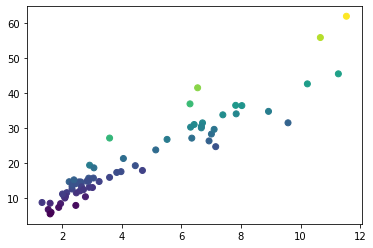

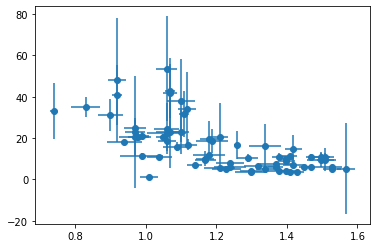

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

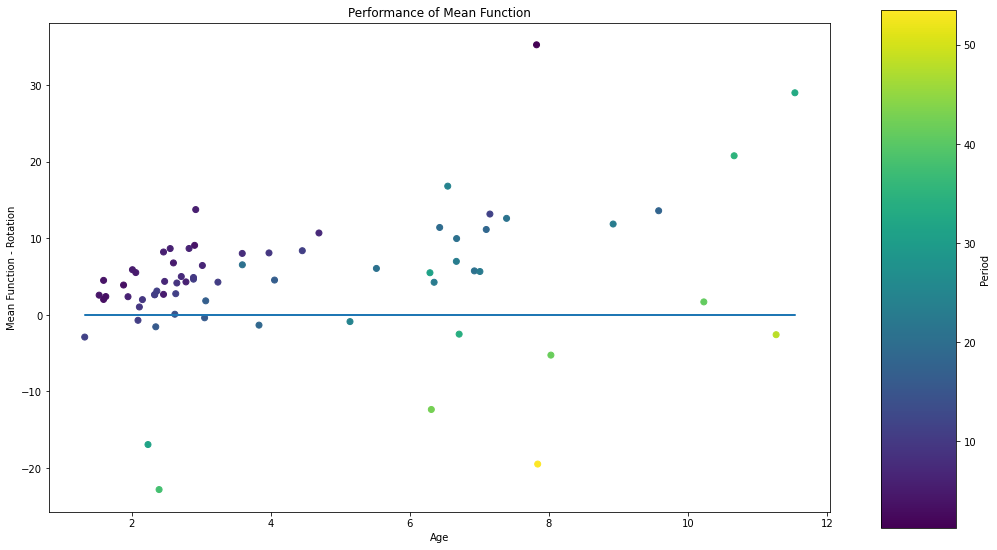

In [ ]:
data = np.array([te, p, age, mass]).T
a = 0.5189
b=0.75
c=0.4
d=0.601
f = -0.6
X1 = np.log(data[:,2]) #age
X2 = r.t2bv(data[:,0])#data[::al,2] #B_V
X3 = data[:, 3] #mass
x = mean_fn(X1, X2, a, b, c, d)
plt.scatter(data[:,2], x, c=X2, cmap='viridis')
plt.show()
plt.errorbar(X3, p, xerr=mass_error, yerr=p_error, fmt='o')#, c=X2, cmap='hsv')
subtract = x-data[:,1]
plt.show()
fig = plt.figure(figsize=(14, 9))
plt.scatter(age, subtract, c=p, cmap='viridis')#data[:,2]
zero = np.zeros(len(x))
plt.plot(age, zero)
#plt.legend(fontsize='medium', loc=3)
plt.title('Performance of Mean Function')
plt.xlabel('Age')
plt.ylabel('Mean Function - Rotation')
#plt.subplots_adjust(bottom=np.min(X2), top=np.max(X2))
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label='Period')
plt.savefig("mean_fn.pdf", bbox_inches = 'tight')
files.download("mean_fn.pdf") 

In [ ]:
above = 0
below = 0
total = 0
for i in range(0, len(subtract)):
  if subtract[i]>=0 and p[i]>30:
    above = above + 1
  if subtract[i]<0 and p[i]>30:
    below = below + 1
  if p[i]>30:
    total = total+1

print('Above', 100*(above/total))
print('Below', 100*(below/total))

Above 36.36363636363637
Below 63.63636363636363


In [ ]:
tf.enable_v2_behavior()
t1 = time.perf_counter()

tfb = tfp.bijectors
tfd = tfp.distributions
psd_kernels = tfp.math.psd_kernels

# observations from a known function at some random points.
X1 = np.log(age) #age
X2 = np.log10(te)#data[::al,2] #B_V
X3 = np.array(mass)
observation_index_points = np.dstack([X1, X2]).reshape(-1, 2)
observation_index_error =np.dstack([np.array(age_error/age), 0.43*np.array(tee)/np.array(te)]).reshape(-1, 2)
shape = np.array(observation_index_points.shape)
resolution = len(X2)
X1_test = np.log(np.linspace( np.min(data[::,2]), np.max(data[::,2]), num=resolution ))
X2_test = np.linspace( np.min(X2), np.max(X2), num=resolution )
X3_test = np.linspace( np.min(X3), np.max(X3), num=resolution )
X_test = np.dstack([X1_test, X2_test]).reshape(resolution,2)# resolution, resolution, 3)

a = 0.5189
b=0.75
c=0.4
d=0.601

Y = observations = (np.array(p) - mean_fn(X1, r.t2bv(np.array(te)), a, b, c, d))
noise_variance = p_error**0.5

sigma_init = 0.1*(max(Y) - min(Y))**0.5
l_scale = 4*(max(X2) - min(X2))
gaussian_process_model = tfd.JointDistributionSequential([
  tfd.LogNormal(sigma_init*np.ones(shape), np.float64(.00001)),
  tfd.LogNormal(l_scale*np.ones(shape), np.float64(.00001)),
  tfd.LogNormal(observation_index_points, observation_index_error),
  #tfd.Normal(X2.reshape(-1), 0.04*X1.reshape(-1)),
  # tfd.Normal(X3.reshape(-1), 0.04*X1.reshape(-1)),
  lambda amplitude, length_scale, observations1_: tfd.GaussianProcess(
      kernel=psd_kernels.ExponentiatedQuadratic(amplitude, length_scale),# mean_fn=mean_fn_hmc,
      index_points=observations1_, observation_noise_variance=observation_index_error)])

initial_chain_states = [
    sigma_init * tf.ones(shape, dtype=np.float64, name='init_amplitude'),
    l_scale * tf.ones(shape, dtype=np.float64, name='init_length_scale'),
    tf.convert_to_tensor(observation_index_points, dtype=np.float64, name='observations1_')]
    # tf.convert_to_tensor(X2.reshape(-1), dtype=np.float64, name='observations2_'),
    # tf.convert_to_tensor(X3.reshape(-1), dtype=np.float64, name='observations3_')]

initial_steps = [
    5e-6* tf.ones(shape, dtype=np.float64),
    5e-6* tf.ones(shape, dtype=np.float64),
    1e-6*tf.convert_to_tensor(observation_index_error, dtype=np.float64)]

unconstraining_bijectors = [
    tfp.bijectors.Softplus(),
    tfp.bijectors.Softplus(),
    # tfp.bijectors.Softplus(),
    tfp.bijectors.Softplus()]

def unnormalized_log_posterior(*args):
  return gaussian_process_model.log_prob(*args, x=observations)

# noise_var1 = tfp.util.TransformedVariable(
#   noise_variance, tfb.Exp(), dtype=tf.float64, name='noise_variance')

# #optimizer = tf.optimizers.Adam(learning_rate=5, beta_1=.9, beta_2=.99)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.2, nesterov=False)
# def optimize():
#   with tf.GradientTape() as tape:
#     loss = -gp.log_prob(observations)
#   grads = tape.gradient(loss, gp.trainable_variables)
#   optimizer.apply_gradients(zip(grads, gp.trainable_variables))
#   return loss

num_results = 50
num_burnin_steps = 100
@tf.function
# def run_mcmc():
#   return tfp.mcmc.sample_chain(
#       num_results=num_results,
#       num_burnin_steps=num_burnin_steps,
#       num_steps_between_results=3,
#       current_state=initial_chain_states,
#       kernel=tfp.mcmc.SimpleStepSizeAdaptation(
#           inner_kernel = tfp.mcmc.HamiltonianMonteCarlo( 
#               target_log_prob_fn=unnormalized_log_posterior,
#               step_size=initial_steps,
#               num_leapfrog_steps=4), 
#               num_adaptation_steps=int(num_burnin_steps)),
#       trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

def run_mcmc():
  return tfp.mcmc.sample_chain(
      num_results=num_results,
      num_burnin_steps=num_burnin_steps,
      num_steps_between_results=3,
      current_state=initial_chain_states,
      kernel = tfp.mcmc.NoUTurnSampler( 
              target_log_prob_fn=unnormalized_log_posterior,
              step_size=initial_steps,
              unrolled_leapfrog_steps=4, parallel_iterations=2))
#   kernel=tfp.mcmc.SimpleStepSizeAdaptation(
# def run_mcmc():
#   return tfp.mcmc.sample_chain(
#       num_results=num_results,
#       num_burnin_steps=num_burnin_steps,
#       num_steps_between_results=3,
#       current_state=initial_chain_states,
#       kernel = tfp.mcmc.SimpleStepSizeAdaptation(
#           inner_kernel = tfp.mcmc.NoUTurnSampler( 
#           target_log_prob_fn=unnormalized_log_posterior,
#           step_size=initial_steps,
#           unrolled_leapfrog_steps=4, parallel_iterations=1),
#           num_adaptation_steps=int(num_burnin_steps)),
#         trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

[
      amplitudes,
      length_scales,
      observations1_#, observations2_,observations3_
], is_accepted = run_mcmc()


#print("Acceptance rate: {}".format(np.mean(is_accepted)))
#observation_index_points = np.dstack([observations1_.numpy()[0], observations2_.numpy()[0], observations3_.numpy()[0]]).reshape(-1,3)
observation_index_points_1 = np.mean(observations1_,axis=0)#np.dstack([observations1_.numpy()[0], observations2_.numpy()[0], observations3_.numpy()[0]]).reshape(-1,3)
observations_l = np.array(p) - mean_fn(observation_index_points_1[:,0], r.t2bv(10**observation_index_points_1[:,1]), a, b, c, d)
#Y = observations = np.array(p) - mean_fn(observation_index_points[:,0], r.t2bv(10**(observation_index_points[:,1])), a, b, c, d)

gp = tfd.GaussianProcessRegressionModel(
    kernel=psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales)),
    index_points=X_test,
    observation_index_points=observation_index_points_1,
    observations= observations_l,
    observation_noise_variance=noise_variance, predictive_noise_variance = noise_variance)

# for i in range(100):
#   neg_log_likelihood_ = optimize()
#   if i % 100 == 0:
#     print('.')

# print("Final NLL = {}".format(neg_log_likelihood_))

samples = gp.sample(10).numpy()
var = np.array(gp.variance())
# ==> 10 independently drawn, joint samples at `index_points`.
# ==> 10 independently drawn, noisy joint samples at `index_points`
t2 = time.perf_counter()
print()


/usr/local/lib/python3.7/dist-packages/tensorflow_probability/python/mcmc/sample.py:341: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


In [ ]:

noise_var1 = tfp.util.TransformedVariable(
  0.001*noise_variance, tfb.Exp(), dtype=tf.float64, name='noise_variance')

optimizer = tf.optimizers.Adam(learning_rate=.016, beta_1=.9, beta_2=.99)
#optimizer = tf.keras.optimizers.SGD(learning_rate=1., momentum=0.0, nesterov=False)
def optimize():
  with tf.GradientTape() as tape:
    loss = -gp.log_prob(observations)
  grads = tape.gradient(loss, gp.trainable_variables)
  optimizer.apply_gradients(zip(grads, gp.trainable_variables))
  return loss

gp = tfd.GaussianProcessRegressionModel(
    kernel=psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales)),
    index_points=X_test,
    observation_index_points=observation_index_points_1,
    observations= observations,
    observation_noise_variance=noise_variance, predictive_noise_variance = noise_var1)

for i in range(1000):
  neg_log_likelihood_ = optimize()
  if i % 100 == 0:
    print('.')
print("Final NLL = {}".format(neg_log_likelihood_))
samples = gp.sample(10).numpy()
var = np.array(gp.variance())

.
.
.
.
.
.
.
.
.
.
Final NLL = [ 5964.99516669  2194.80023565  1623.733126    3280.67252173
  2497.2442896   6015.89598839  1666.95261614  3459.99840885
  2848.76693899  1052.77803749  6615.05296818  1646.54388857
  2451.5699708   1324.07340732  4008.21189027  6338.26053085
  6811.7156183   1102.26423641  5776.13983642  4941.65491942
  1359.87138423  6866.98940595  1483.00575298 10483.03043909
  2503.80076251  1293.79066612  6100.77581606  6421.20313738
  3578.77982634  2551.1177395   1892.6842859   3539.08953685
  4231.70465822  2204.47258552  4959.00905217  3928.59346398
  6886.66356484  1333.27984609  9886.75724854  6464.59139164
  1293.49786832  1970.63491939  1076.56817984  5824.57748195
 12431.27425163  2530.2987732   2080.80440694  5145.84521865
  2213.17961923  4993.90504772  3568.52659836  1906.11663022
  9461.46945683  3149.20104273  7093.32846625  1129.514736
  3206.93469667  1795.6312935   1248.13267296  2777.55922104
  1654.45449318  4671.34804804  1554.05008081  1508.377

In [ ]:
(noise_var1 - noise_variance)/noise_variance

<tf.Tensor: shape=(75,), dtype=float64, numpy=
array([-0.48885403, -0.49773993, -0.5020317 , -0.49318173, -0.4961291 ,
       -0.48881223, -0.50162813, -0.49267954, -0.49462865, -0.50955708,
       -0.48837918, -0.50181667, -0.49635097, -0.50536211, -0.49141395,
       -0.48856649, -0.48825787, -0.50867386, -0.48901696, -0.48991462,
       -0.50490637, -0.48822541, -0.50346817, -0.48707018, -0.49609781,
       -0.5057625 , -0.48874441, -0.48850821, -0.49237328, -0.49587609,
       -0.49975648, -0.49247342, -0.49099181, -0.49768279, -0.48989244,
       -0.49157611, -0.48821401, -0.50524313, -0.48717196, -0.48847847,
       -0.50576644, -0.49918917, -0.5091245 , -0.48897396, -0.48686396,
       -0.49597278, -0.49844553, -0.48966419, -0.49763171, -0.48984836,
       -0.49239894, -0.49965612, -0.48725964, -0.49358376, -0.4880994 ,
       -0.50821356, -0.49340346, -0.50051632, -0.50639392, -0.49490579,
       -0.50174317, -0.49028346, -0.5027182 , -0.50319418, -0.49641788,
       -0.4969894

In [ ]:
samples = gp.sample(10).numpy()
var = np.array(gp.variance())

'\n, var_names=("amplitudes",\n      "length_scales",\n      "observation_noise_variances"))'

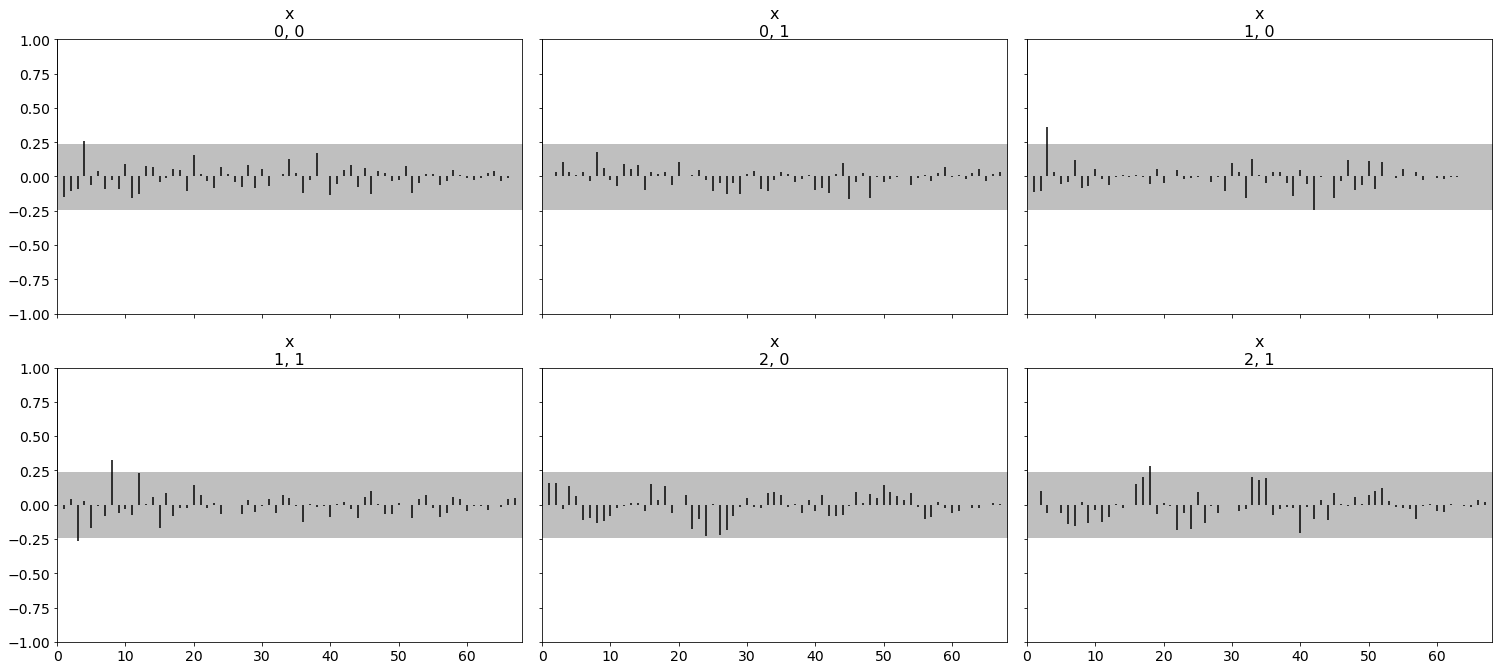

In [ ]:
var1 = np.array([
      amplitudes[0],
      length_scales[0], observations1_[0]])
az.plot_autocorr(var1)
'''
, var_names=("amplitudes",
      "length_scales",
      "observation_noise_variances"))'''

In [ ]:
# te = data0[:,2].tolist()
# tee= data0[:,3].tolist()
# age = data0[:,4].tolist()
# agle = data0[:,5].tolist()
# ague = data0[:,6].tolist()
# mass = data0[:,7].tolist()
# massle = data0[:,8].tolist()
# massue = data0[:,9].tolist()
# p = data0[:,21].tolist()
# pl = data0[:,22].tolist()
# pu = data0[:,23].tolist()
# p_0 = data0[:,21].tolist()
# mass_error = (np.array(massle) + np.array(massue))/2
# age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
# p_error = ((np.array(pl)+np.array(pu))/2)#(np.log(p) - np.log(np.array(p)-np.array(pl)))

# indctr = data0[:,24]
# index = 4
# for i in range(0, len(p)-index):
#   if p[i]>5:# or indctr[i]>1:
#     index = index+1

# for i in range(0, len(p)):
#   if p_0[i]<30:# or indctr[i]>1:
#     te.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     tee.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     age.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     agle.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     ague.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     mass.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     massle.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     massue.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     pl.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     pu.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
#     p.pop(int(np.where(np.array(p) == float(p_0[i]))[0]))
# p = data0[:,21]
# te = data0[:,2][p>5].tolist()
# tee= data0[:,3][p>5].tolist()
# age = data0[:,4][p>5].tolist()
# agle = data0[:,5][p>5].tolist()
# ague = data0[:,6][p>5].tolist()
# mass = data0[:,7][p>5].tolist()
# massle = data0[:,8][p>5].tolist()
# massue = data0[:,9][p>5].tolist()
# pl = data0[:,22][p>5].tolist()
# pu = data0[:,23][p>5].tolist()
# p_0 = data0[:,21][p>5].tolist()
# p = data0[:,21][p>5].tolist()

# mass_error = (np.array(massle) + np.array(massue))/2
# age_error = (np.array(agle)+np.array(ague))/2#np.log(age) - np.log(np.array(age) - np.array(agle))
# p_error = ((np.array(pl)+np.array(pu))/2)#/np.array(p)#(np.log(p) - np.log(np.array(p)-np.array(pl)))

In [ ]:
# tf.enable_v2_behavior()
# t1 = time.perf_counter()

# tfb = tfp.bijectors
# tfd = tfp.distributions
# psd_kernels = tfp.math.psd_kernels

# X1 = np.log(age) #age
# X2 = np.log10(te)#data[::al,2] #B_V
# X3 = np.array(mass)
# observation_index_points = np.dstack([X1, X2]).reshape(-1, 2)
# observation_index_error =np.dstack([np.array(age_error/age), 0.43*np.array(tee)/np.array(te)]).reshape(-1, 2)
# shape = np.array(observation_index_points.shape)
# resolution = len(X2)
# X1_test = np.log(np.linspace( np.min(data[::,2]), np.max(data[::,2]), num=resolution ))
# X2_test = np.linspace( np.min(X2), np.max(X2), num=resolution )
# X3_test = np.linspace( np.min(X3), np.max(X3), num=resolution )
# X_test = np.dstack([X1_test, X2_test]).reshape(resolution,2)# resolution, resolution, 3)

# a = 0.5189
# b=0.75
# c=0.4
# d=0.601

# Y = observations = np.array(p) - mean_fn(observation_index_points_1[:,0], r.t2bv(np.array(10**observation_index_points_1[:,1])), a, b, c, d)
# noise_variance = p_error**0.5
# length_scales_2 = max(observation_index_points[:,1]) - min(observation_index_points[:,1])

# amplitudes = (max(Y) - min(Y))**0.25
# length_scales = max(observation_index_points[:,0]) - min(observation_index_points[:,0])


# kernel = psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales/4))*psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales_2/2))
# gp = tfd.GaussianProcessRegressionModel(
#     kernel=kernel, #psd_kernels.ExponentiatedQuadratic(np.mean(amplitudes), np.mean(length_scales)),
#     index_points=X_test,
#     observation_index_points=observation_index_points,
#     observations= observations_l,
#     observation_noise_variance=noise_variance)#, predictive_noise_variance = 0.7*noise_variance)

# # #print("Final NLL = {}".format(neg_log_likelihood_))

# samples = gp.sample(10).numpy()
# var = np.array(gp.variance())

NameError: ignored

In [ ]:
p

In [ ]:
mean_fn(observation_index_points_1[:,0], r.t2bv(np.array(10**observation_index_points_1[:,1])), a, b, c, d)

In [ ]:
numElems = len(Y)
sample = samples[0] + mean_fn(observation_index_points_1[:,0], r.t2bv(10**(observation_index_points_1[:,1])), a ,b ,c ,d)#np.array(observation_index_points[:,1])
idx = np.round(np.linspace(0, len(np.array(sample).reshape(numElems**2)) - 1, numElems)).astype(int)
# Picks equal spaced elements from (longer) prediction array so that its shape of data

mu_test = (np.array(sample).reshape(numElems**2)[idx])
sd_test = (np.array(var).reshape(numElems**2)[idx]) 

vals = np.sort([mu_test, sd_test], axis=1)
# numElems = len(Y)
# sample = samples[0] + mean_fn(observation_index_points[:,0], r.t2bv(10**(np.array(observation_index_points[:,1]))), a ,b ,c ,d)
# idx = np.round(np.linspace(0, len(np.array(sample).reshape(numElems)) - 1, numElems)).astype(int)
# # Picks equal spaced elements from (longer) prediction array so that its shape of data

# mu_test = (np.array(sample).reshape(numElems)[idx])
# sd_test = (np.array(var).reshape(numElems)[idx]) 

# vals = np.sort([mu_test, sd_test], axis=1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

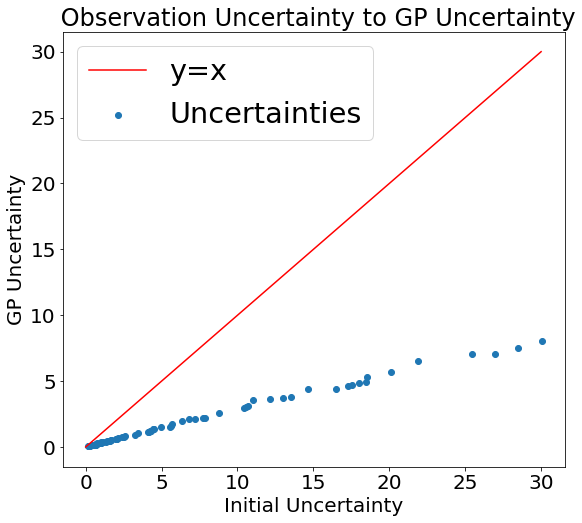

In [ ]:
plt.figure(figsize=(9,8))
plt.rcParams['font.size'] = '20'
x = np.linspace(0, 30)
plt.plot(x, x , 'r', label = 'y=x')
plt.scatter(np.sort(p_error), vals[1]**2, label='Uncertainties')
plt.xlabel('Initial Uncertainty')
plt.ylabel('GP Uncertainty')
plt.title(' Observation Uncertainty to GP Uncertainty')
plt.legend(fontsize='x-large')
# plt.savefig("error_adam.pdf")
# files.download("error_adam.pdf") 

In [ ]:
vals[1].shape

(54,)

Text(0, 0.5, 'Frequency')

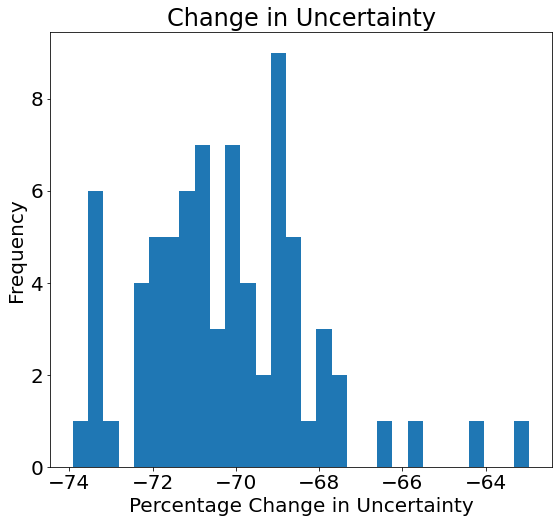

In [ ]:
plt.figure(figsize=(9,8))
plt.title('Change in Uncertainty')
per_error = 100*(vals[1]**2 - np.sort(noise_variance**2))/np.sort(p_error)
plt.hist(per_error,  bins=30)
plt.xlabel('Percentage Change in Uncertainty')
plt.ylabel('Frequency')

In [ ]:
sorted_p = np.sort(p)
perstd= 0
for i in range(0,len(p)):
  if abs((sorted_p[i] - vals[0, i]))<3*vals[1,i]:#1*(vals[1,i]**2+(0.9*noise_variance[i])**2)**0.5:
    perstd=perstd+1
print(perstd/len(p))

0.9466666666666667


In [ ]:
ab8 = 0
for i in age:
  if i>8:
    ab8 = ab8 + 1

print(100*ab8/(len(age)+1))

10.144927536231885


In [ ]:
100*(max(age)-8)/(max(age)-min(age))

34.650170314396455

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

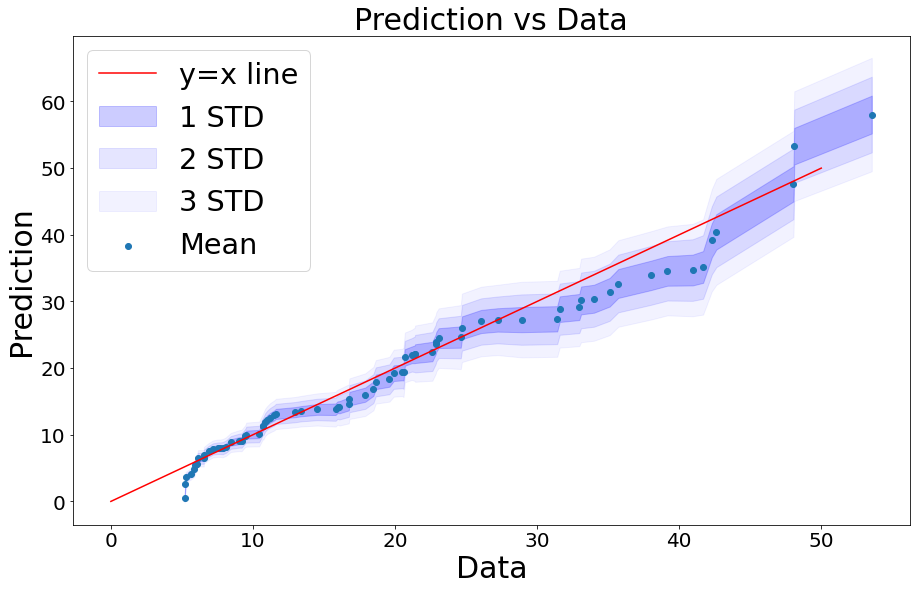

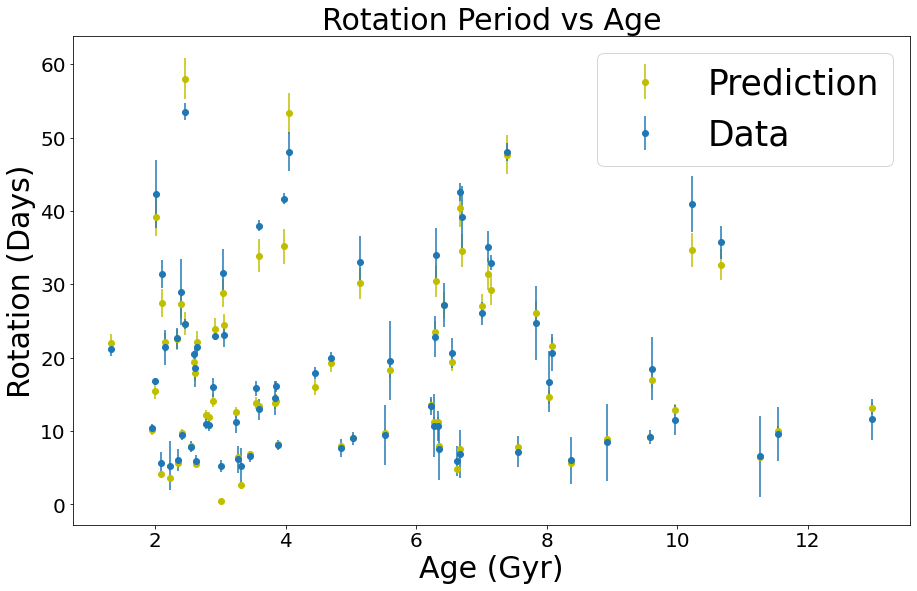

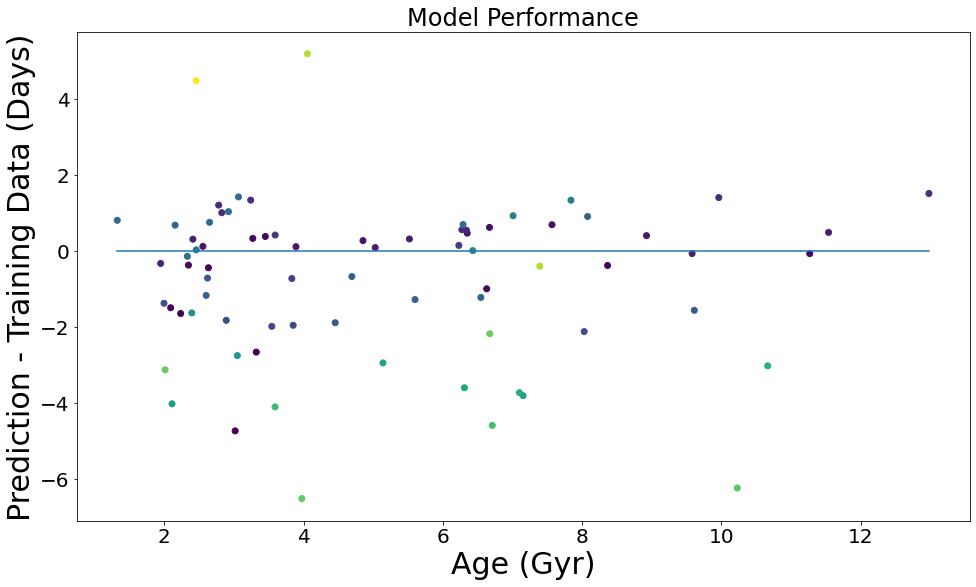

In [ ]:
plt.figure(figsize=(15,9))
x = np.linspace(0, 50)
zline = np.linspace(min(np.exp(X1)), max(np.exp(X1)))
font = {'size': 30,
        }
plt.title('Prediction vs Data', fontdict=font)
# #plt.errorbar(np.sort(data[::al, 1]), vals[0,:], yerr=vals[1,:]**0.5, fmt='bo')
plt.fill_between(np.sort(p), vals[0,:] - vals[1,:], vals[0,:] + vals[1,:], color='blue', alpha=0.2, label='1 STD')
plt.fill_between(np.sort(p), vals[0,:] - 2*vals[1,:], vals[0,:] + 2*vals[1,:], color='blue', alpha=0.1, label='2 STD')
plt.fill_between(np.sort(p), vals[0,:] - 3*vals[1,:], vals[0,:] + 3*vals[1,:], color='blue', alpha=0.05, label='3 STD')

#plt.errorbar(np.sort(p), np.sort(mu_test), yerr=vals[1,:], fmt='o')
plt.scatter(np.sort(p), np.sort(mu_test), label='Mean')
plt.plot(x, x , 'r', label='y=x line')
plt.xlabel('Data', fontdict=font)
plt.ylabel('Prediction', fontdict=font)
plt.legend(fontsize='x-large')
# plt.savefig("adam.pdf")
# files.download("adam.pdf") 

plt.figure(figsize=(15,9))
plt.title('Rotation Period vs Age', fontdict=font)
plt.errorbar(np.exp(X1), np.sort(vals[0]), yerr=vals[1], fmt='o', c='y', label='Prediction')
plt.errorbar(np.exp(X1), np.sort(p), yerr=noise_variance, fmt='o', label='Data')
plt.xlabel('Age (Gyr)', fontdict=font)
plt.ylabel('Rotation (Days)', fontdict=font)
plt.legend(fontsize='xx-large')
# plt.savefig("scatter_adam.pdf")
# files.download("scatter_adam.pdf") 

plt.figure(figsize=(16,9))
plt.plot(zline, np.zeros(zline.shape))
#plt.errorbar(X2, np.sort(vals[0]) - np.sort(p), yerr=2*vals[1], fmt='o', c='y', label='2 standard deviations', alpha=0.4)
#plt.errorbar(X2, np.sort(vals[0]) - np.sort(p), yerr=vals[1], fmt='o', c='y', label='Prediction')
plt.scatter(np.exp(X1), np.sort(vals[0]) - np.sort(p), c=np.sort(p), cmap='viridis')
plt.xlabel('Age (Gyr)', fontdict=font)
plt.ylabel('Prediction - Training Data (Days)', fontdict=font)
plt.title('Model Performance')
# cax = plt.axes([0.93, 0.1, 0.075, 0.8])
# plt.colorbar(cax=cax, label='Period')
# plt.legend(fontsize='medium', loc=3)
plt.savefig("residuals_adam.pdf")#, bbox_inches = 'tight')
files.download("residuals_adam.pdf") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

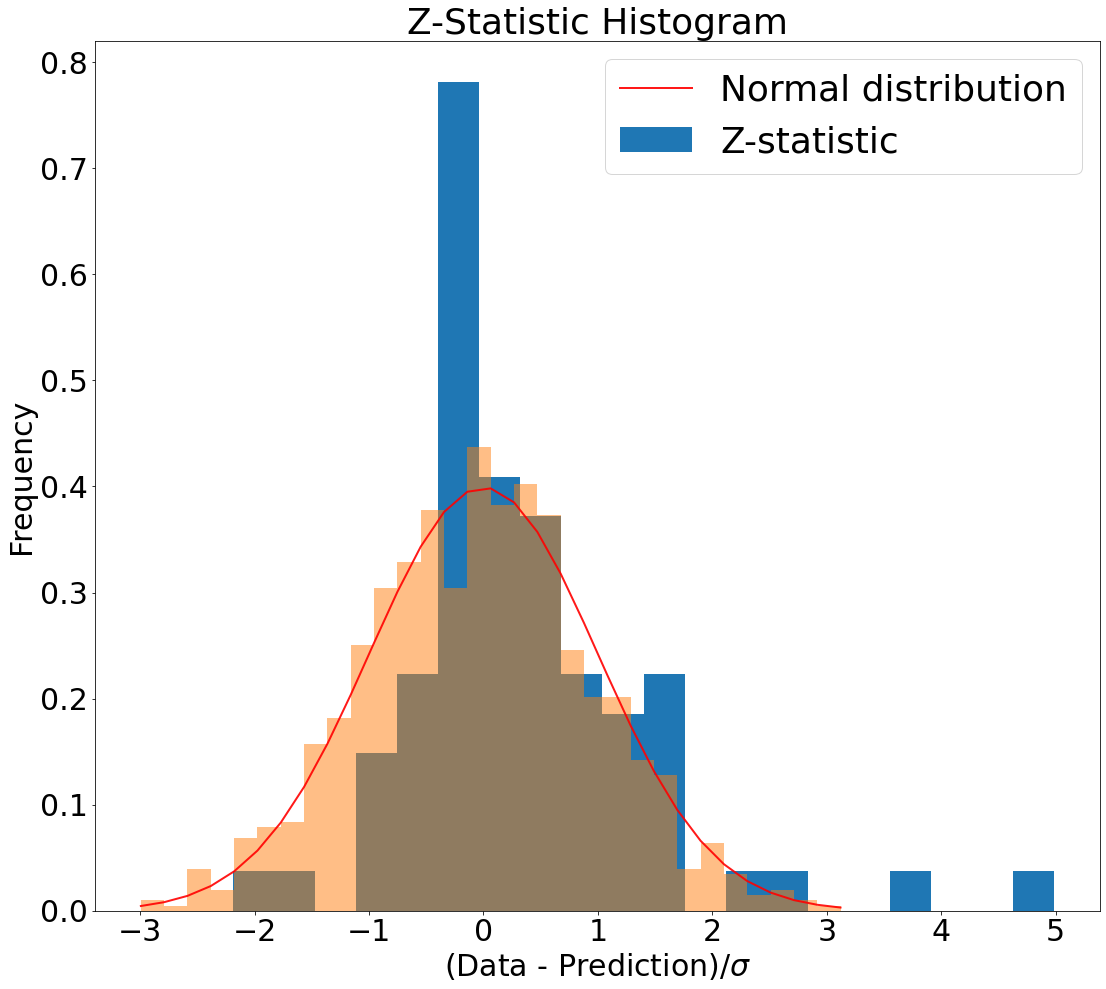

In [ ]:
Z = (np.sort(p)-vals[0,:])/(vals[1,:]+p_error)**0.5
Z = Z[Z<6]
plt.rcParams['font.size'] = '30'
plt.figure(figsize=(18,16))
plt.hist(Z, density=True, bins=20, label='Z-statistic')
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.5)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', alpha=0.9, label='Normal distribution')
plt.xlabel('(Data - Prediction)/$\sigma$')
plt.ylabel('Frequency')
plt.title('Z-Statistic Histogram')
plt.legend(fontsize='large')
plt.savefig("z_stat_adam.pdf")
files.download("z_stat_adam.pdf") 

(75,)


Text(0, 0.5, 'Frequency')

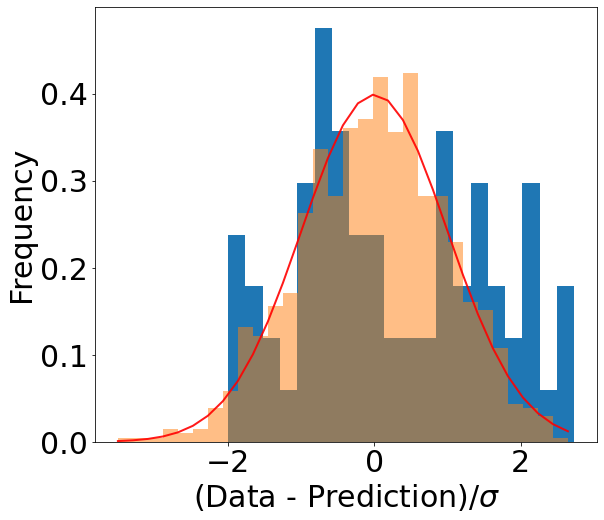

In [ ]:
Z = (np.sort(p)-vals[0,:])/vals[1,:]
print(Y.shape)
Z = Z[Z<5]
plt.figure(figsize=(9,8))
plt.hist(Z, density=True, bins=20)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True, alpha=0.5)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', alpha=0.9)
#plt.xlim((-5,5))
plt.xlabel('(Data - Prediction)/$\sigma$')
plt.ylabel('Frequency')

In [ ]:
max(Z)

In [ ]:
import collections 
PooledModel = collections.namedtuple('PooledModel', ['Amplitude1','Length_Scale1', 'Obs'])
samplesN = [
      amplitudes[49],
      length_scales[49],
      observations1_[49]
]
pooled_samples = PooledModel._make(samplesN)

In [ ]:
for var2, var_samples in pooled_samples._asdict().items():
  print('R-hat for ', var2, ':\t',
        tfp.mcmc.potential_scale_reduction(var_samples).numpy())

In [ ]:
import seaborn as sns
def plot_traces(var_name, samples, num_chains):
  if isinstance(samples, tf.Tensor):
    samples = samples.numpy() # convert to numpy array
  fig, axes = plt.subplots(1, 2, figsize=(14, 1.5), sharex='col', sharey='col')
  for chain in range(num_chains):
    axes[0].plot(samples[:, chain], alpha=0.7)
    axes[0].title.set_text("'{}' trace".format(var_name))
    sns.kdeplot(samples[:, chain], ax=axes[1], shade=False)
    axes[1].title.set_text("'{}' distribution".format(var_name))
    axes[0].set_xlabel('Iteration')
    axes[1].set_xlabel(var_name)
  plt.show()

In [ ]:
for var1, var_samples in pooled_samples._asdict().items():
  plot_traces(var1, samples=var_samples, num_chains=2)

In [ ]:
D = (observation_index_points_1[:,0]- observation_index_points[:,0])/observation_index_points[:,0]
plt.figure(figsize=(9,8))
plt.hist(D, bins=20)

In [ ]:
D_2 = (observation_index_points_1[:,0] - observation_index_points[:,1])/observation_index_points[:,1]
plt.hist(D_2, density=True, bins=20)